**Problem 1 - Data Read, Write and Inspect:**

Complete all following Task:

• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:

In [ ]:
import pandas as pd
dataset  = pd.read_csv("/content/drive/MyDrive/Dataset/bank.csv")

# 2. Check DataFrame info
print("DataFrame Info:")
print(dataset.info())
print("---------------------------------------------------")
#(a)columns with dtypes = object
df = dataset.select_dtypes(include=['object']).columns
print("column with dtypes=object:",df)


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
---------------------------------------------------
column with dtypes=object:

In [ ]:
# (b) unique values of those columns
for column in df:
  unique_values = dataset[column].unique()
  print(f"unique values in column '{column}': {unique_values}")

unique values in column 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
unique values in column 'marital': ['married' 'single' 'divorced']
unique values in column 'education': ['tertiary' 'secondary' 'unknown' 'primary']
unique values in column 'default': ['no' 'yes']
unique values in column 'housing': ['yes' 'no']
unique values in column 'loan': ['no' 'yes']
unique values in column 'contact': ['unknown' 'cellular' 'telephone']
unique values in column 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
unique values in column 'poutcome': ['unknown' 'failure' 'other' 'success']
unique values in column 'y': ['no' 'yes']


In [ ]:
# (c) check for the total number of null values in each column
null_values = dataset.isnull().sum()
print("The total values in each column:\n",null_values)

The total values in each column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.

In [ ]:
# Drop columns with dtypes=object
numeric_data = dataset.select_dtypes(exclude=['object'])

# Write the DataFrame to a CSV file
numeric_data.to_csv('banknumericdata.csv', index=False)

# Read the CSV file
numeric_data_read = pd.read_csv("banknumericdata.csv")

#find the summary statistics
summary_stats = numeric_data_read.describe()
print("Summary stats of numeric data:\n",summary_stats)

Summary stats of numeric data:
                 age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.0000

**Problem 2 - Data Imputations:**

Complete all the following Task:

• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.

In [9]:
medical_student = pd.read_csv("/content/drive/MyDrive/Dataset/medical_students_dataset.csv")
# Check info of the DataFrame
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


2. Check info of the DataFrame and identify column with missing (null) values.

In [10]:
# Check number of null values in each column
print("\nNull Values Count:")
print(medical_student.isnull().sum())


Null Values Count:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64


3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.

In [11]:
for column in medical_student.columns:
  null_Count = medical_student[column].isnull().sum()

  if null_Count > 0:
    print(f"Column '{column}' has {null_Count} null values.")

    #for numerical column
    if medical_student[column].dtype in ['int64','float64']:
      mean_value = medical_student[column].mean()
      medical_student[column].fillna(mean_value,inplace=True)

    #for categorical column
    elif medical_student[column].dtype == 'object':
      mode_value = medical_student[column].mode()[0]
      medical_student[column].fillna(mode_value,inplace=True)

# Verify null values after cleaning
print("\nNull Values Count After Cleaning:")
print(medical_student.isnull().sum())

Column 'Student ID' has 20000 null values.
Column 'Age' has 20000 null values.
Column 'Gender' has 20000 null values.
Column 'Height' has 20000 null values.
Column 'Weight' has 20000 null values.
Column 'Blood Type' has 20000 null values.
Column 'BMI' has 20000 null values.
Column 'Temperature' has 20000 null values.
Column 'Heart Rate' has 20000 null values.
Column 'Blood Pressure' has 20000 null values.
Column 'Cholesterol' has 20000 null values.
Column 'Diabetes' has 20000 null values.
Column 'Smoking' has 20000 null values.


<ipython-input-11-4f8236230d31>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  medical_student[column].fillna(mean_value,inplace=True)
<ipython-input-11-4f8236230d31>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',


Null Values Count After Cleaning:
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64


4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.

In [12]:
# Check for duplicate values
duplicate_count = medical_student.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

# Remove duplicate rows
medical_student.drop_duplicates(inplace=True)

# Verify duplicates were removed
remaining_duplicates = medical_student.duplicated().sum()
print(f"Remaining duplicates after removal: {remaining_duplicates}")
# Display final dataset shape
print(f"\nOriginal dataset shape: {medical_student.shape}")

Number of duplicate rows: 12572
Remaining duplicates after removal: 0

Original dataset shape: (187428, 13)


**3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:**

Problem - 1:

Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [13]:
titanic_ds = pd.read_csv("/content/drive/MyDrive/Dataset/Titanic-Dataset.csv")

#subset the DataFrame for the specified column
subset_df = titanic_ds[['Name','Pclass','Sex','Age', 'Fare', 'Survived']]

# Filter rows where Pclass is equal to 1
first_class_df = subset_df[subset_df['Pclass']==1]
first_class_df.head()

,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


In [14]:
# Calculate statistics for the 'Fare' column
fare_mean = first_class_df['Fare'].mean()
fare_median = first_class_df['Fare'].median()
fare_max = first_class_df['Fare'].max()
fare_min = first_class_df['Fare'].min()

print("Mean Fare:", fare_mean)
print("Median Fare:", fare_median)
print("Maximum Fare:", fare_max)
print("Minimum Fare:", fare_min)

Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0




**Problem - 2:**

How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [15]:
# Check for null values in the 'Age' column
null_age_count = subset_df['Age'].isnull().sum()
print("Number of null values in 'Age' column:", null_age_count)

# Drop rows with null values in the 'Age' column
subset_df = subset_df.dropna(subset=['Age'])

# Verify null values were dropped
remaining_null_age = subset_df['Age'].isnull().sum()
print("Remaining null values in 'Age' column after dropping:", remaining_null_age)


Number of null values in 'Age' column: 177
Remaining null values in 'Age' column after dropping: 0


**Problem - 3:**

Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).

In [16]:
# Perform one-hot encoding on the 'Embarked' column
# Check if 'Embarked' column exists before proceeding
if 'Embarked' in titanic_ds.columns:
    embarked_encoding = pd.get_dummies(titanic_ds['Embarked'], prefix='Embarked')

    # Concatenate the one-hot encoded columns with the original DataFrame
    titanic_ds = pd.concat([titanic_ds, embarked_encoding], axis=1)

    # Drop the original 'Embarked' column
    titanic_ds.drop(columns=['Embarked'], inplace=True)

    # Display the updated DataFrame
    titanic_ds.head()
else:
    print("Column 'Embarked' not found in the DataFrame.")

Problem - 4:


Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

In [17]:
# Group by 'Sex' and calculate the mean survival rate
survival_rates = titanic_ds.groupby('Sex')['Survived'].mean()
print("Mean Survival Rates by Gender:")
print(survival_rates)

Mean Survival Rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


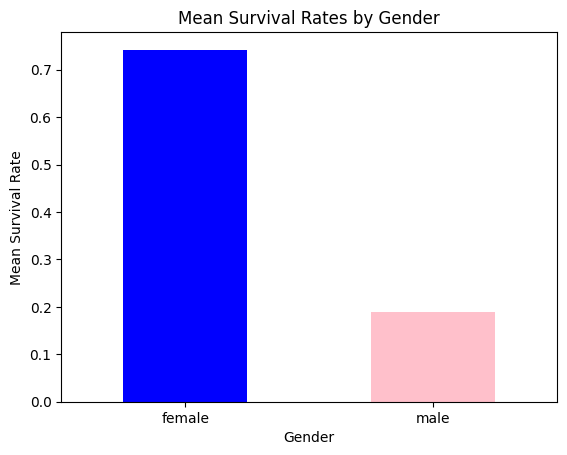

In [18]:
import matplotlib.pyplot as plt

# Plot the survival rates by gender
survival_rates.plot(kind='bar', color=['blue', 'pink'])
plt.title('Mean Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.xticks(rotation=0)
plt.show()